### Importing libriaries

In [23]:
import networkx as nx
# import urllib -- Did not work on my linux machine - using requests instead
import re
import tqdm
import collections
import requests
#import community.community_louvain as cl
import json
import matplotlib.pyplot as plt
import pandas as pd
import copy
import numpy as np

In [3]:

# to create the network I will create a simple function that gets references from wiki article

def get_references(text):
    pattern = r'\[\[(.*?)\]\]'
    matches = re.findall(pattern, text)

    matches_more = []
    for match in matches:
        x = match.split('|')
        for m in x:
            matches_more.append(m)

    return matches_more

#The function above uses regex to gather everything inside double square brackets `[[]]`. We know that there might be more than one option there so after that we split everything on `|` mark.  



In [4]:

# Creating function to load up the rapper page

def get_wikipage(wiki_name):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = f"titles={wiki_name.replace(' ', '_')}" # replacing space with _
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json" # we want have it in json format


    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)


    wikitext = requests.get(query).content.decode('utf-8') # decoding to utf

    d = json.loads(wikitext)

    # now we want the actual latest article from wikipedia,
    # so we have to access this information within dictionaries
    page = d['query']['pages']
    page_id = list(page.keys())[0]
    page_title = page[page_id]['title']
    content = page[page_id]['revisions'][0]['*']

    return page_title, content

# better content
def get_wikipage_content(wiki_name):
    #wiki_name = wiki_name.decode('utf-8')
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    prop="extracts"
    exlimit='1'
    explaintext='1'
    title = f"titles={wiki_name.replace(' ', '_')}"
    content = "prop=extracts&rvprop=content"
    dataformat ="format=json"

    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    
    wikitext = requests.get(query).content.decode('utf-8')
    
    d = json.loads(wikitext)   

    page = d['query']['pages']
    page_id = list(page.keys())[0]
    page_title = page[page_id]['title']
    
    content = page[page_id]['extract']
    pattern = r'<[^>]*>'
    filtered_text = re.sub(pattern, '', content)

    return page_title, filtered_text

In [5]:
page_title, content = get_wikipage('List_of_music_genres_and_styles')

In [6]:
music_list = get_references(content)

In [7]:
better_music_list = copy.copy(music_list)

In [8]:
for x in better_music_list:
    if x + ' (music)' in better_music_list:
        better_music_list.remove(x)
    elif x + ' music' in better_music_list:
        better_music_list.remove(x)
    elif x + ' in music' in better_music_list:
        better_music_list.remove(x)
    elif x + ' (genre)' in better_music_list:
        better_music_list.remove(x)



In [9]:
with open ('music_genres_new.txt', 'w') as f:
    for x in better_music_list:
        f.writelines(x + '\n')

I then manually go through music genres and manually remove some of the values

In [11]:
with open ('music_genres.txt', 'r') as f:
    genres = f.readlines()
    genres = [x.replace('\n', '') for x in genres]

In [12]:
genres[:5]

['Music',
 'music genre',
 'genres',
 'Andalusian classical music',
 'Indian classical music']

In [13]:
page_title, content = get_wikipage_content('Korean court music')

In [14]:
Di = nx.DiGraph()
Di.add_nodes_from(genres)

In [15]:
for name in tqdm.tqdm(genres):

    try:
        # for each name get wikipage
        page_title, content = get_wikipage(name)
        _, clean_content = get_wikipage_content(name)
        Di.nodes[name]['content'] = clean_content
        # for each ref get wikipage
        
        for ref in get_references(content):
            
            # if it is add edge between those
            if ref in genres:
                if ref != name:
                    Di.add_edge(name, ref) 
    except:
        print(f'failed for: {page_title}')

  4%|█▍                                       | 56/1555 [00:31<10:00,  2.49it/s]

failed for: Classic female blues


  4%|█▊                                       | 67/1555 [00:36<12:26,  1.99it/s]

failed for: Jump blues


  6%|██▍                                      | 91/1555 [00:47<10:23,  2.35it/s]

failed for: Bluegrass music


  7%|██▋                                     | 105/1555 [00:54<10:12,  2.37it/s]

failed for: Honky-tonk


  7%|██▊                                     | 107/1555 [00:55<11:05,  2.18it/s]

failed for: Country music


  8%|███▏                                    | 123/1555 [01:03<09:22,  2.55it/s]

failed for: Western music (North America)


 10%|███▉                                    | 152/1555 [01:17<09:37,  2.43it/s]

failed for: Andean new age music


 15%|█████▊                                  | 226/1555 [01:52<10:36,  2.09it/s]

failed for: Musique concrète


 16%|██████▍                                 | 250/1555 [02:04<09:43,  2.24it/s]

failed for: Neue Deutsche Welle


 24%|█████████▌                              | 370/1555 [03:03<10:18,  1.92it/s]

failed for: Balearic beat


 28%|███████████▎                            | 438/1555 [03:33<07:37,  2.44it/s]

failed for: Intelligent dance music


 31%|████████████▌                           | 489/1555 [03:58<07:26,  2.39it/s]

failed for: Brostep


 40%|████████████████▏                       | 627/1555 [05:06<07:14,  2.14it/s]

failed for: Jazz fusion


 41%|████████████████▎                       | 635/1555 [05:10<05:52,  2.61it/s]

failed for: M-Base


 43%|█████████████████▏                      | 667/1555 [05:25<05:56,  2.49it/s]

failed for: Brill Building (genre)


 49%|███████████████████▌                    | 760/1555 [06:11<05:02,  2.63it/s]

failed for: Yé-yé
failed for: Yé-yé


 74%|████████████████████████████▊          | 1149/1555 [09:33<02:24,  2.81it/s]

failed for: Pashto music
failed for: Pashto music


 74%|████████████████████████████▊          | 1151/1555 [09:34<02:01,  3.33it/s]

failed for: Pashto music
failed for: Pashto music


 74%|████████████████████████████▉          | 1152/1555 [09:34<01:54,  3.53it/s]

failed for: Pashto music


 74%|████████████████████████████▉          | 1155/1555 [09:35<02:30,  2.66it/s]

failed for: Tuvan throat singing


 75%|█████████████████████████████▏         | 1162/1555 [09:39<03:12,  2.04it/s]

failed for: Chinese hip hop


 78%|██████████████████████████████▌        | 1219/1555 [10:08<02:00,  2.78it/s]

failed for: String (Thai pop)


 79%|██████████████████████████████▋        | 1222/1555 [10:10<01:55,  2.87it/s]

failed for: Original Pilipino Music


 91%|███████████████████████████████████▌   | 1418/1555 [11:52<00:51,  2.67it/s]

failed for: Cumbia


100%|██████████████████████████████████████▉| 1551/1555 [13:02<00:01,  2.56it/s]

failed for: Simon Frith


100%|███████████████████████████████████████| 1555/1555 [13:04<00:00,  1.98it/s]


In [18]:
G = Di.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G)) # sanity check

In [21]:
nx.write_graphml(Di, 'directed.graphml')

In [22]:
nx.write_graphml(G, 'undirected.graphml')

In [14]:
G = nx.read_graphml('undirected.graphml')
D = nx.read_graphml('directed.graphml')

In [11]:
pos = nx.kamada_kawai_layout(G,scale=5)
degrees = [G.degree[node] for node in G.nodes()]

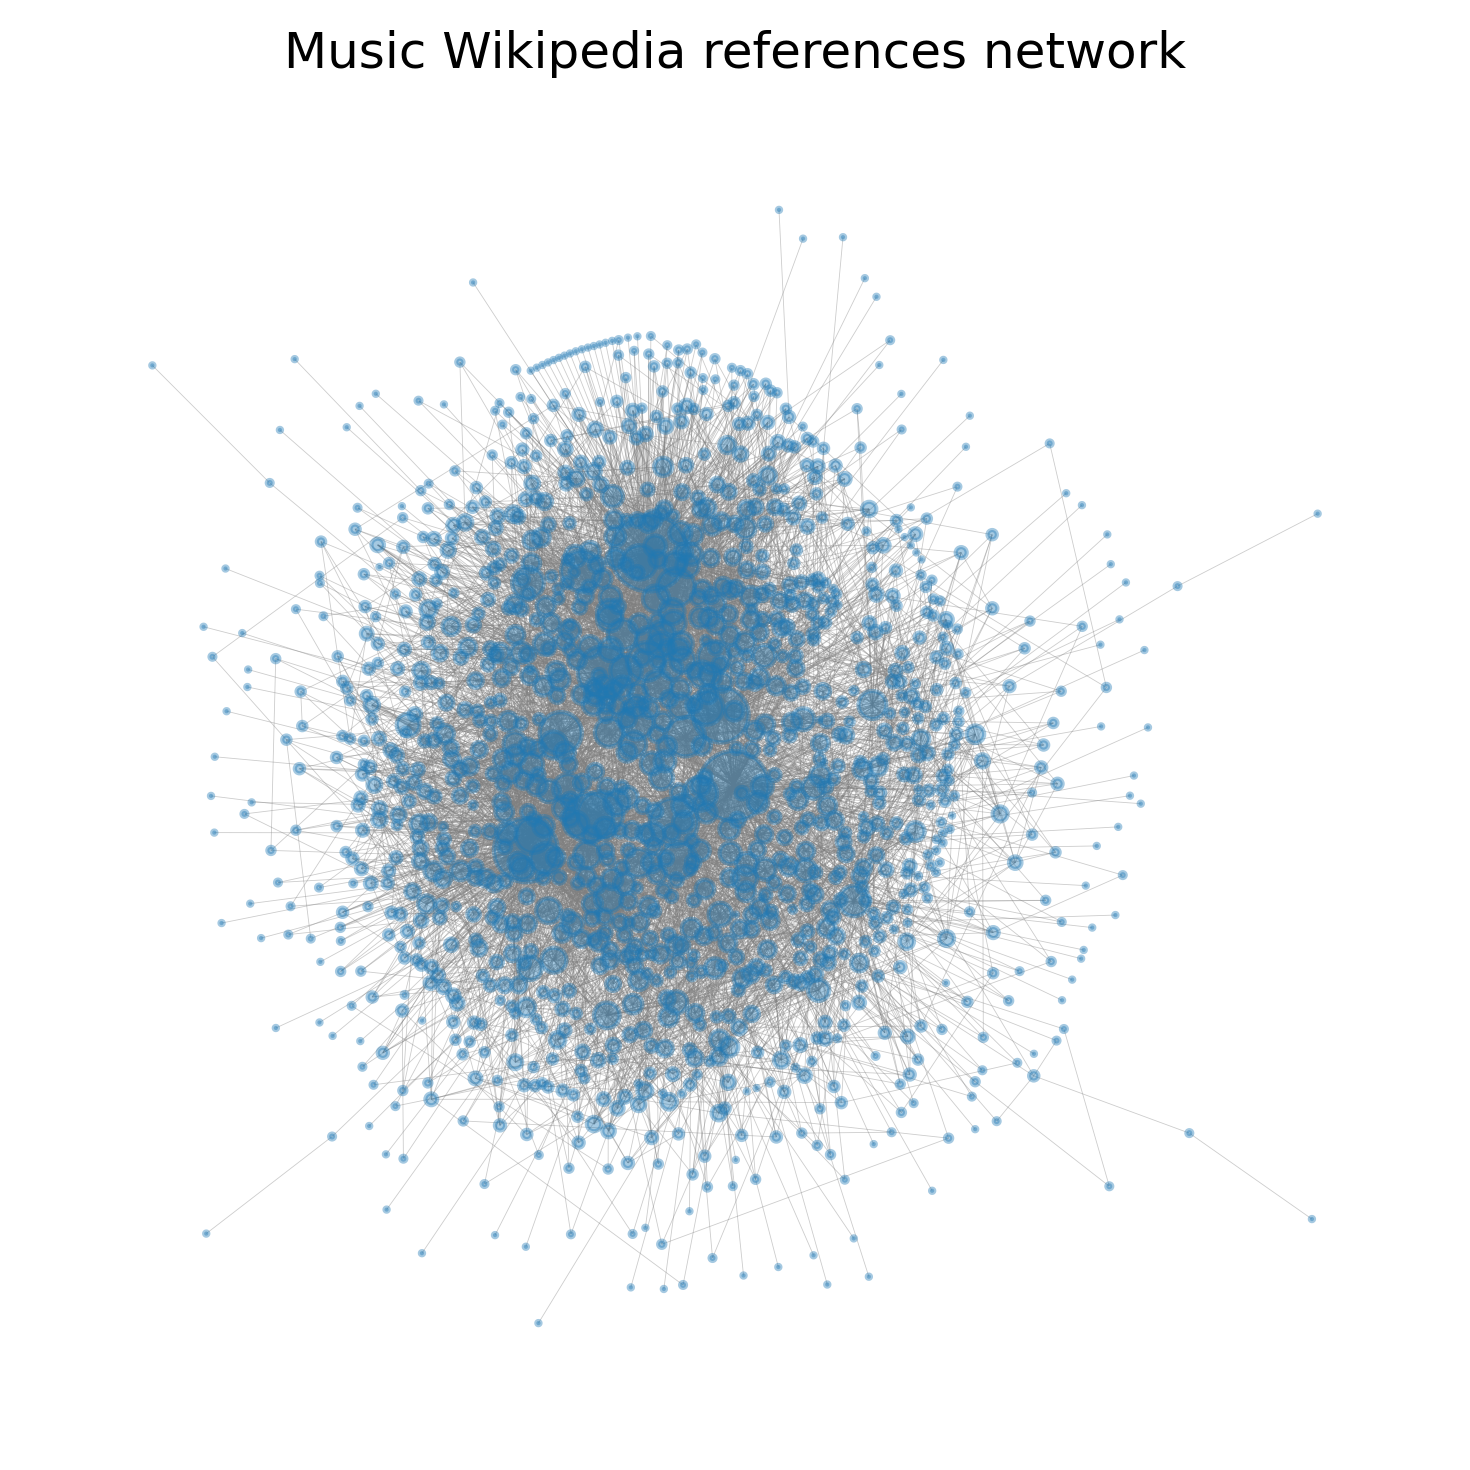

In [49]:

fig = plt.figure(1, figsize=(5, 5), dpi=300)

plt.title('Music Wikipedia references network')
nx.draw(G, 
        pos,
       width = 0.2,
       with_labels=False,
       #node_color=color_map,
       node_size = degrees,
       edge_color='gray',
       alpha=0.4, 
    )

plt.tight_layout()
plt.savefig("Graph.png", format="PNG")


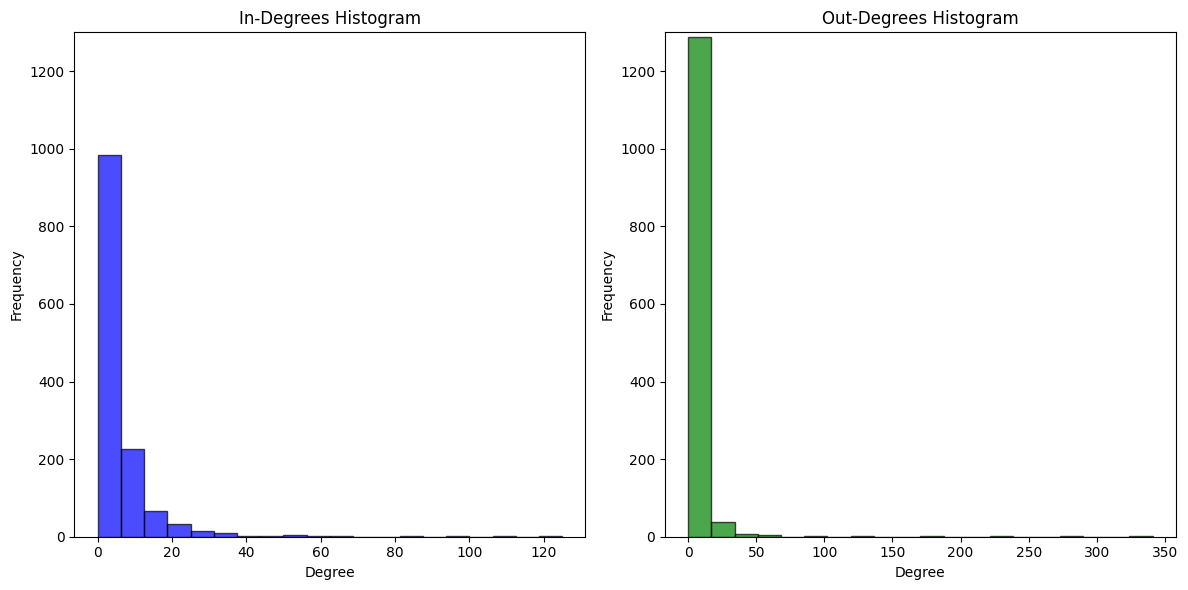

In [18]:

# Calculate in-degrees and out-degrees
in_degrees = dict(D.in_degree())
out_degrees = dict(D.out_degree())

# Plot the histograms
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(list(in_degrees.values()), bins=20, alpha=0.7, color='b', edgecolor='black')
plt.title('In-Degrees Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.ylim(0, 1300) # limiting the scale

plt.subplot(122)
plt.hist(list(out_degrees.values()), bins=20, alpha=0.7, color='g', edgecolor='black')
plt.title('Out-Degrees Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.ylim(0, 1300) # limiting the scale

plt.tight_layout()
plt.show()
plt.savefig('in-out-deg.')

In [29]:
axs

<Axes: >

 minumum degree: 0
 maximum degree: 342


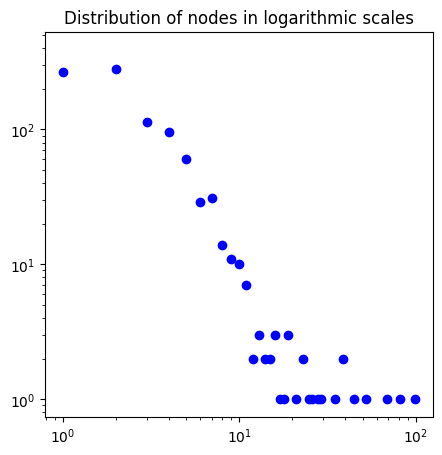

In [44]:
list_degree=list(G.degree())
nodes , degree = map(list, zip(*list_degree))
print(f" minumum degree: {np.min(degree)}")
print(f" maximum degree: {np.max(degree)}")


hist, bin_edges = np.histogram(degree, bins=100, density=False)
#fig, axs = plt.subplots(1,2, figsize=(5,5))
plt.figure(figsize=(5,5))
plt.plot(hist, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.title("Distribution of nodes in logarithmic scales")
plt.savefig('distribution.png')
plt.show()


In [50]:
import powerlaw

In [56]:
in_degrees = np.array([x[1] for x in D.in_degree])
out_degrees = np.array([x[1] for x in D.out_degree])

In [57]:
powerlaw.Fit(list(in_degrees)).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


3.2551140115813624

In [58]:
powerlaw.Fit(list(out_degrees)).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


3.04713885994142

# Further analysis 

In [23]:
D = nx.read_graphml('directed.graphml')

In [25]:
len(D.nodes)

1344

In [26]:
len(D.edges)

7857

In [27]:
print(D.nodes['Techno']['content'])


Techno is a genre of electronic dance music (EDM) which is generally produced for use in a continuous DJ set, with tempo often varying between 120 and 150 (as per Marcello Perri) beats per minute (bpm). The central rhythm is typically in common time (4/4) and often characterized by a repetitive four on the floor beat. Artists may use electronic instruments such as drum machines, sequencers, and synthesizers, as well as digital audio workstations. Drum machines from the 1980s such as Roland's TR-808 and TR-909 are highly prized, and software emulations of such retro instruments are popular.
Much of the instrumentation in techno emphasizes the role of rhythm over other musical parameters. Techno tracks mainly progress over manipulation of timbral characteristics of synthesizer presets and, unlike forms of EDM that tend to be produced with synthesizer keyboards, techno does not always strictly adhere to the harmonic practice of Western music and such structures are often ignored in favor

## COMMUNITIES

   Community Size  Count
0               1     84
1               2      4
2            1240      1
3              12      1


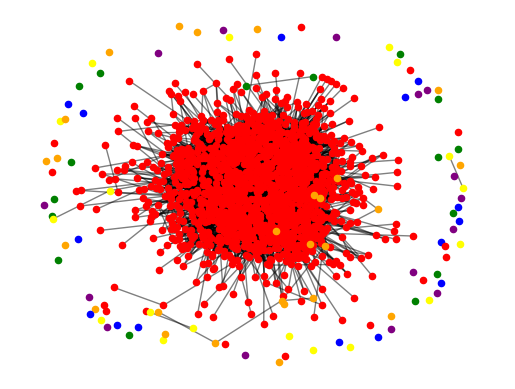

In [39]:
# detect communities using Girvan-Newman algorithm
communities_generator = nx.community.girvan_newman(D)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

# counting communities and their sizes
community_sizes = [len(community) for community in next_level_communities]

# create a DataFrame to display the size distribution of communities
df = pd.DataFrame(community_sizes, columns=["Community Size"])
size_counts = df["Community Size"].value_counts().reset_index()
size_counts.columns = ['Community Size', 'Count']
print(size_counts)

# visualize the graph with different colors for different communities
pos = nx.spring_layout(G, k=0.15) 
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange'] 

for i, community in enumerate(next_level_communities):
    nx.draw_networkx_nodes(G, pos, community, node_size=20, node_color=colors[i % len(colors)])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off') 

# save the plot as an image file
plt.savefig('community_graph.png', format='png', dpi=500, bbox_inches='tight')

plt.show()


In [42]:
# Filter out outliers
outliers = [community for community in next_level_communities if len(community) in [1]]
for i, community in enumerate(outliers):
    print(f"Community {i+1} (Size: {len(community)}): {community}")
    
# Filter out communities with exactly 2 or 12 nodes
target_communities = [community for community in next_level_communities if len(community) in [2 , 12]]
for i, community in enumerate(target_communities):
    print(f"Community {i+1} (Size: {len(community)}): {community}")

Community 1 (Size: 1): {'20th'}
Community 2 (Size: 1): {'21st'}
Community 3 (Size: 1): {'High modernism'}
Community 4 (Size: 1): {'Reactionary bluegrass'}
Community 5 (Size: 1): {'Honky-tonk country'}
Community 6 (Size: 1): {'Western (Cowboy)'}
Community 7 (Size: 1): {'Ambient industrial'}
Community 8 (Size: 1): {'Hardcore breaks'}
Community 9 (Size: 1): {'Spacesynth'}
Community 10 (Size: 1): {'Atmospheric drum and bass'}
Community 11 (Size: 1): {'Jazzstep'}
Community 12 (Size: 1): {'New Romantic#Styles of music'}
Community 13 (Size: 1): {'Livetronica'}
Community 14 (Size: 1): {'Melodic funk'}
Community 15 (Size: 1): {'Industrial hardcore'}
Community 16 (Size: 1): {'Disco house'}
Community 17 (Size: 1): {'Moombahsoul'}
Community 18 (Size: 1): {'Mid-tempo'}
Community 19 (Size: 1): {'Neurostep'}
Community 20 (Size: 1): {'Colour bass'}
Community 21 (Size: 1): {'American folk revival'}
Community 22 (Size: 1): {'Folk noir'}
Community 23 (Size: 1): {'Pizzica'}
Community 24 (Size: 1): {'Tradi

### 3. Propagation of music
Looking into how music history was shaped Extracting dates and locations from the text

#### 4. Text analysis
- Extracting sentiment and emotions from text 
- Clustering based on extracted data Comparing clusters with communities
- [Potential] Looking for persons in text with NER - are there people that initiated multiple genres? 
- [Potential] Text embedding of summary - which summaries are similar?